# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

### a)

In [7]:
mod_lars = Lars(fit_intercept=False)
# fit
mod_lars.fit(X, Y)

Lars(fit_intercept=False)

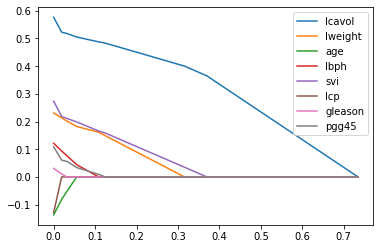

In [8]:
# plot
plt.plot(mod_lars.alphas_, mod_lars.coef_path_.T)
plt.legend(df.columns[0:8])
plt.show()

Order in which the variables are included in the model:

In [13]:
mod_lars.coef_

array([ 0.57621928,  0.23085294, -0.13704517,  0.12155214,  0.2731707 ,
       -0.1284605 ,  0.03079639,  0.10891159])

In [11]:
df.columns[0:8][np.abs(mod_lars.coef_path_).max(axis=1).argsort()[::-1]]

Index(['lcavol', 'svi', 'lweight', 'age', 'lcp', 'lbph', 'pgg45', 'gleason'], dtype='object')

### b)

In [14]:
mod_lars.alphas_[0]

0.7344603262136732

### b1)

In [53]:
selected_variables = []

In [16]:
correlations=[np.corrcoef(X[:,i],Y)[0,1] for i in range(X.shape[1])]
np.argmax(correlations)

0

In [54]:
s1_index=np.argmax(correlations)
s1_value=correlations[s1_index]
s1_name=df.columns[s1_index]
selected_variables.append(s1_index)

In [20]:
s1_index, s1_value, s1_name

(0, 0.7344603262136737, 'lcavol')

### b2)

In [23]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:,s1_index].reshape(-1,1), Y)

LinearRegression(fit_intercept=False)

In [24]:
mod1.coef_[0]

0.7344603262136729

### b3)

In [27]:
mod1.predict(X[:,s1_index].reshape(-1,1))

array([-1.20881992, -1.468416  , -1.16560366, -1.59978229, -0.3749514 ,
       -1.50322425, -0.38387869, -0.41145031, -1.33203676, -0.70585464,
       -0.68612427, -1.68941885,  0.16500318,  0.07957571, -0.09022407,
        0.11973363, -1.10590257,  0.58784988, -1.19773313, -0.73142502,
       -0.12691054,  0.44425224, -1.18683916,  0.27041114, -0.60430544,
        0.06070283, -0.5244027 , -1.09648303, -0.19401275,  0.66374171,
       -0.66699646, -0.73142502, -0.0467578 , -0.83939618, -0.85192435,
       -0.0261058 ,  0.04578814, -0.5591038 ,  0.8211619 , -0.34608051,
       -0.45690767,  0.05774816, -0.48093643,  0.26405183,  0.08527018,
        0.19663334,  0.8630636 , -0.11704597,  0.24786521, -0.08091651,
       -0.16166198,  0.19425616, -0.5244027 ,  0.48672236,  1.12974021,
       -0.05202897, -0.2351771 , -0.55515181, -0.50592386, -0.18087128,
       -0.5591038 ,  0.40552827,  0.89304001,  0.42888496,  0.45297976,
        0.06802908,  0.42147201,  0.53138037, -1.12517754, -0.09

In [34]:
# code 
alphas=np.linspace(0,1,100)
Y_hat=mod1.predict(X[:,s1_index].reshape(-1,1))
r_list=np.zeros((X.shape[1],len(alphas)))
for i, alpha in enumerate(alphas):
    r=Y-alpha*Y_hat
    for j in range(X.shape[1]):
        r_list[j,i]=np.corrcoef(X[:,j],r)[0,1]
    

In [35]:
r_list.shape

(8, 100)

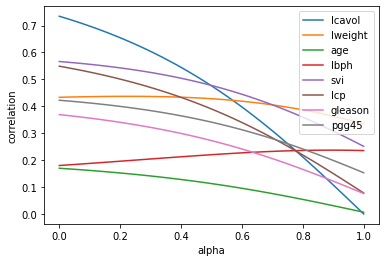

In [36]:
plt.plot(alphas, r_list.T)
plt.legend(df.columns[0:8])
plt.xlabel('alpha')
plt.ylabel('correlation')
plt.show()

Line from lecture: blue.

### b4)

The plot shows that next chosen variable will be purpule one, so `svi`. The approximate value of alpha is 0.5.

In [47]:
s2_index=np.argsort(np.abs(r_list[:,0]))[-2]
s2_name=df.columns[s2_index]
s2_name, s2_index

('svi', 4)

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

In [37]:
# code
# alphas - generated before using linspace
computed_values=np.zeros((X.shape[1],len(alphas)))
for i, alpha in enumerate(alphas):
    for j in range(X.shape[1]):
        computed_values[j,i]=np.std(Y)*np.corrcoef(X[:,j], Y)[0,1]-np.std(Y_hat)*alpha*np.corrcoef(X[:,j], Y_hat)[0,1]

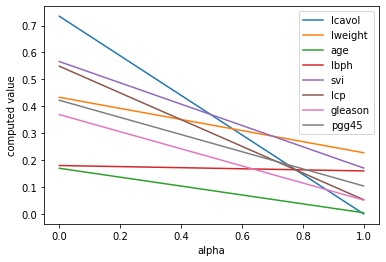

In [40]:
# plot
plt.plot(alphas, computed_values.T)
plt.legend(df.columns[0:8])
plt.xlabel('alpha')
plt.ylabel('computed value')
plt.show()

In [64]:
#compute the exact value of alpha
nominator=np.std(Y)*np.corrcoef(X[:,s1_index], Y)[0,1]-np.std(Y)*np.corrcoef(X[:,s2_index], Y)[0,1]
denominator=np.std(Y_hat)*(np.corrcoef(X[:,s1_index], Y_hat)[0,1]-np.corrcoef(X[:,s2_index], Y_hat)[0,1])
alpha_t=nominator/denominator
alpha_t

0.4967289013871957

### b6)

In [65]:
a_2=mod_lars.alphas_[1]
r1_a2=Y-alpha_t*Y_hat
selected_variables=[s1_index, s2_index]
a_2, r1_a2, selected_variables

(0.3696326552610746,
 array([-1.93286206, -1.57030771, -1.72072335, -1.50505428, -1.64838179,
        -0.74492254, -1.30093384, -1.20978234, -0.58451905, -0.89556181,
        -0.7141089 , -0.21574349, -1.13688851, -1.02380977, -0.89536447,
        -0.95768192, -0.32862088, -1.15016476, -0.20640237, -0.40211649,
        -0.66790453, -0.9348708 , -0.09210336, -0.80012848, -0.35008099,
        -0.65011784, -0.33020553, -0.03176091, -0.45217588, -0.83804916,
        -0.15122955, -0.04610866, -0.38620266,  0.01913469,  0.04812514,
        -0.32901025, -0.30212236,  0.02803433, -0.63833841, -0.00322762,
         0.06950538, -0.17743101,  0.10730849, -0.22127395, -0.00462097,
        -0.03240065, -0.34998685,  0.1368619 , -0.02460813,  0.13870725,
         0.23562758,  0.07697518,  0.43991821, -0.05641293, -0.36409031,
         0.23450089,  0.38651263,  0.5507957 ,  0.53693017,  0.38071297,
         0.59435736,  0.1252931 , -0.11686807,  0.13843157,  0.12646299,
         0.32254396,  0.175610

### b7)

In [56]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:,selected_variables], r1_a2)
mod2.coef_

array([0.33354851, 0.24020136])

### b8)

In [66]:
# code
# alphas - generated before using linspace
r2_matrix=np.zeros((X.shape[1],len(alphas)))
Y_hat2=mod2.predict(X[:,selected_variables])
for i, alpha in enumerate(alphas):
    r2=r1_a2-alpha*Y_hat2
    for j in range(X.shape[1]):
        r2_matrix[j,i]=np.corrcoef(X[:,j],r2)[0,1]

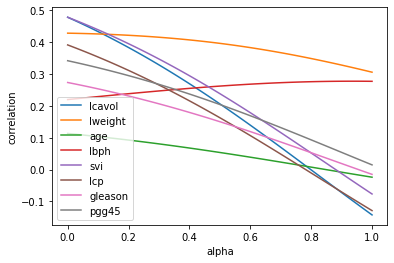

In [67]:
#plot
plt.plot(alphas, r2_matrix.T)
plt.legend(df.columns[0:8])
plt.xlabel('alpha')
plt.ylabel('correlation')
plt.show()

Blue and purpule.

### b9)

Orange line `lweight`.

### b10)

In [69]:
# code
# alphas - generated before using linspace
computed_values2=np.zeros((X.shape[1],len(r1_a2)))
for i, alpha in enumerate(r1_a2):
    for j in range(X.shape[1]):
        computed_values2[j,i]=np.std(r1_a2)*np.corrcoef(X[:,j], r1_a2)[0,1]-np.std(Y_hat)*alpha*np.corrcoef(X[:,j], Y_hat)[0,1]

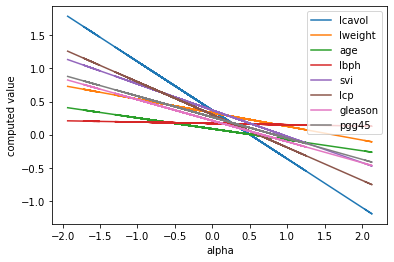

In [71]:
# plot
plt.plot(r1_a2, computed_values2.T)
plt.legend(df.columns[0:8])
plt.xlabel('alpha')
plt.ylabel('computed value')
plt.show()

### b11)

### c)

## Task 2

In [ ]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot